# Scatter plots in a `GridPlot` layout with a mix of 2d an 3d cameras

In [1]:
import numpy as np
from fastplotlib import GridPlot

RFBOutputContext()

/home/kushal/Insync/kushalkolar@gmail.com/drive/repos/fastplotlib/fastplotlib/layouts/_base.py:142: UserWarning: `center_scene()` not yet implemented for `PerspectiveCamera`
  warn("`center_scene()` not yet implemented for `PerspectiveCamera`")



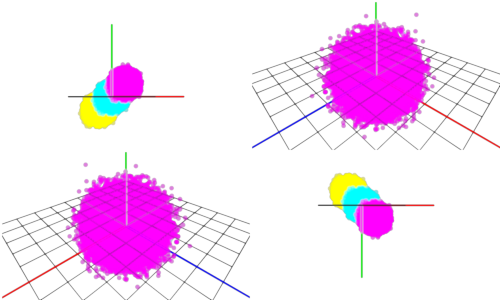

JupyterWgpuCanvas()

In [2]:
# grid with 2 rows and 2 columns
shape = (2, 2)

# define the camera
# a mix of 2d and 3d
cameras = [
    ['2d', '3d'], 
    ['3d', '2d']
]

# pan-zoom controllers for each view
# views are synced if they have the 
# same controller ID

# you can only sync controllers that use the same camera type
# i.e. you cannot sync between 2d and 3d subplots
controllers = [
    [0, 1],
    [1, 0]
]

# create the grid plot
grid_plot = GridPlot(
    shape=shape,
    cameras=cameras,
    controllers=controllers
)

# create a random distribution of 100 xyz coordinates
n_points = 100_000
dims = (n_points, 3)

offset = 15

normal = np.random.normal(size=dims, scale=5)
cloud = np.vstack(
    [
        normal - offset,
        normal,
        normal + offset,
    ]
)

colors = ["yellow"] * n_points + ["cyan"] * n_points + ["magenta"] * n_points

for subplot in grid_plot:
    subplot.add_scatter(data=cloud, colors=colors, alpha=0.7, size=5)
    
    subplot.set_axes_visibility(True)
    subplot.set_grid_visibility(True)

# different perspectives on the synced views
grid_plot[1, 0].camera.scale.x = -1
grid_plot[1, 1].camera.scale.y = -1

grid_plot.show()